# Feature Engineering and Modelling


## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import export_graphviz
from sklearn.utils.class_weight import compute_class_weight
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [4]:
df = pd.read_csv('data_for_predictions.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We will focus on training a `Random Forest` classifier.

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.


In [5]:
# Assuming 'churn' is the target variable

X = df.drop(columns=['churn', 'id'])
y = df['churn']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Model training

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [7]:
# Define class weights
class_weights = {0: 1, 1: 10}  # Adjust the weights to penalize misclassification of class 1 more

# Initialize the Random Forest Classifier with class weights
rf_model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_weighted.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
# Predict using the trained model
y_pred_weighted = rf_model_weighted.predict(X_test)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [9]:
# Calculate performance metr

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted, pos_label=1)
recall_weighted = recall_score(y_test, y_pred_weighted, pos_label=1)
f1_weighted = f1_score(y_test, y_pred_weighted, pos_label=1)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
report_weighted = classification_report(y_test, y_pred_weighted)

print(f"Model Accuracy with Class Weights: {accuracy_weighted}")
print(f"Precision with Class Weights: {precision_weighted}")
print(f"Recall with Class Weights: {recall_weighted}")
print(f"F1-Score with Class Weights: {f1_weighted}")
print("Confusion Matrix with Class Weights:\n", conf_matrix_weighted)
print("Classification Report with Class Weights:\n", report_weighted)


Model Accuracy with Class Weights: 0.903925148334094
Precision with Class Weights: 0.8518518518518519
Recall with Class Weights: 0.05227272727272727
F1-Score with Class Weights: 0.09850107066381157
Confusion Matrix with Class Weights:
 [[3938    4]
 [ 417   23]]
Classification Report with Class Weights:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.85      0.05      0.10       440

    accuracy                           0.90      4382
   macro avg       0.88      0.53      0.52      4382
weighted avg       0.90      0.90      0.86      4382



The model accuracy is 0.90, indicating that the Random Forest Classifier correctly predicts the churn status for 90% of the instances in the test set. However, when examining the classification report in detail, we see that Recall for class 1 is very low at 0.05, meaning that the model only identifies 5% of the actual churn instances. This is a critical issue as the model fails to capture most churn cases.The F1-score for class 1 is 0.10, indicating poor performance in identifying churn cases as well.

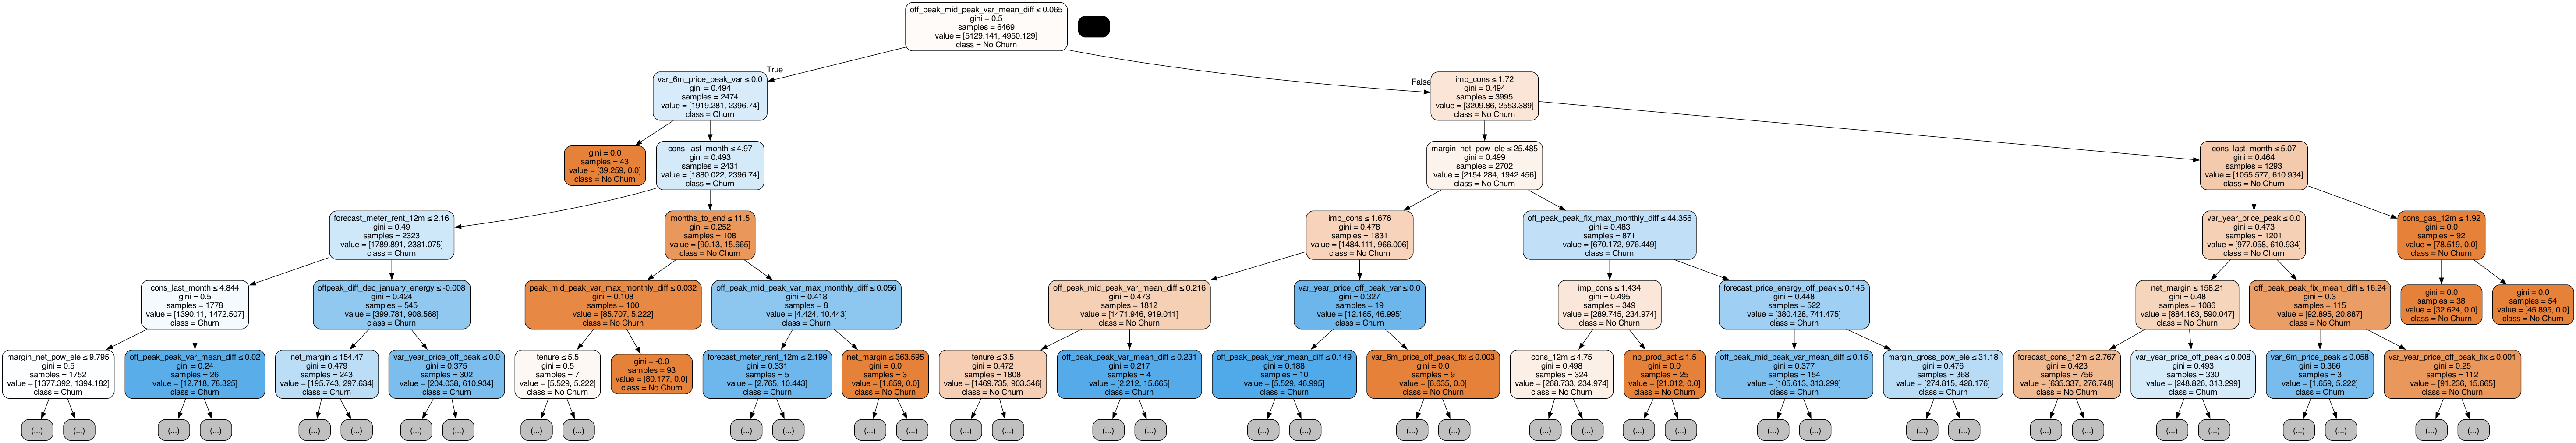

In [10]:
# Extract a single tree
estimator = rf_model_weighted.estimators_[0]

# Export the tree to a dot file with limited depth
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Churn', 'Churn'],
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=5)  # Limit the depth for visualization

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Features like off_peak_mid_peak_var_mean_diff, forecast_meter_rent_12m, cons_gas_12m, and log_margin_net_pow_ele play significant roles in the model’s decision-making process. These features are critical in identifying customers who are likely to churn. The model identifies specific thresholds for features that significantly differentiate between churn and no churn. For instance, a higher forecast_meter_rent_12m and cons_gas_12m are associated with reduced churn risk.

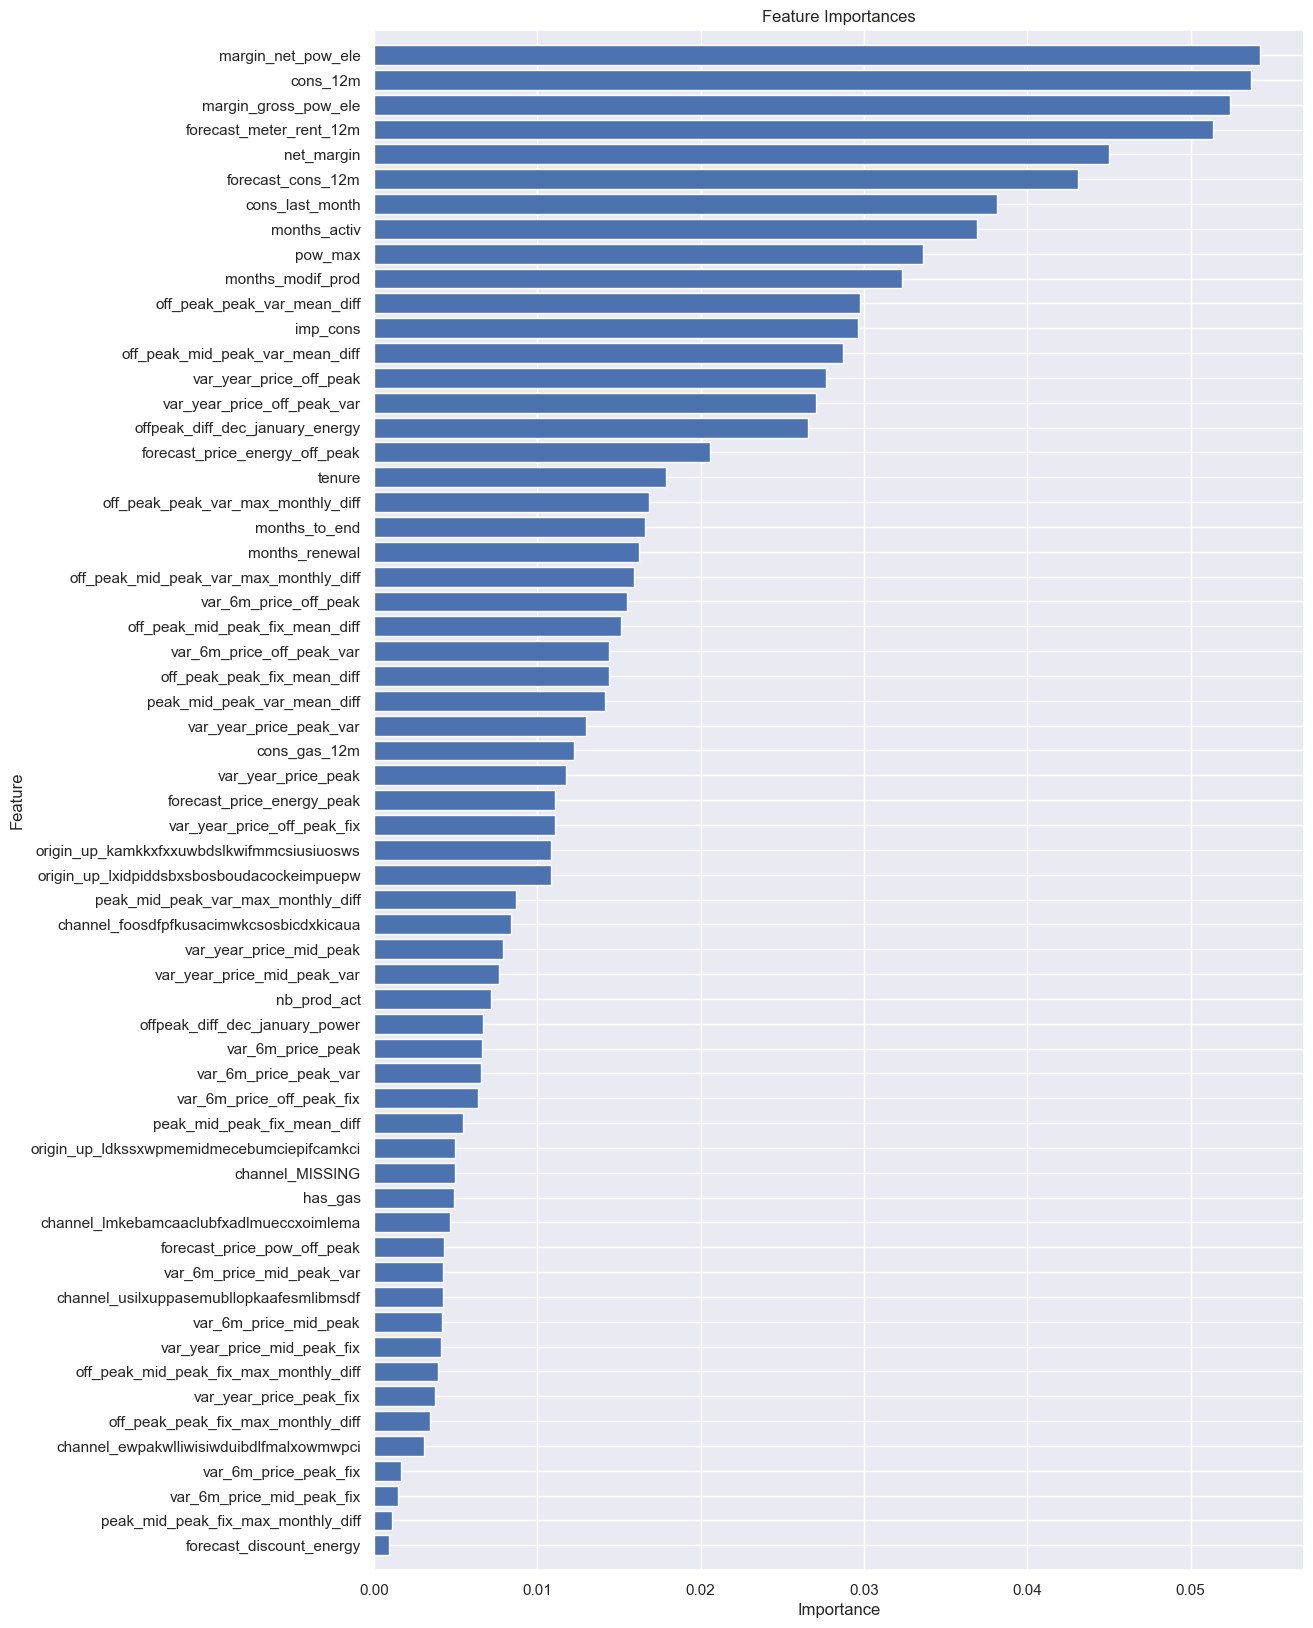

In [11]:
# Analyse feature importance
importances = rf_model_weighted.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 20)) 
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis() 
plt.show()

The high ranking of certain features, like log_margin_net_pow_ele and cons_12m, suggests these are strong predictors of the target variable (churn in this case). But we can notice that price is important feature as well. Features with lower importance may be less relevant and could potentially be dropped to simplify the model.

Lets try to improve our model and apply Gradient Boosting method

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# Standardize the data 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Step 3: Train the Gradient Boosting Classifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [16]:
# Step 4: Evaluate the model performance

y_pred = gb_model.predict(X_test_scaled)
y_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3956
           1       0.47      0.02      0.04       426

    accuracy                           0.90      4382
   macro avg       0.69      0.51      0.49      4382
weighted avg       0.86      0.90      0.86      4382



The model’s performance for class 1 (churn) is quite poor, as evidenced by the low precision, recall, and F1-score. This indicates that the model is struggling to identify the minority class.

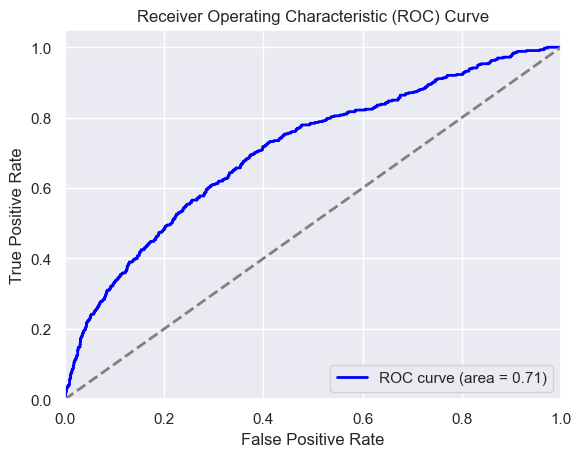

ROC AUC Score: 0.7078277721604314


In [17]:
# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score: {roc_auc}")


The AUC (Area Under the Curve) score for this model is 0.71. This score indicates that there is a 71% chance that the model will be able to distinguish between a positive (churn) and a negative (non-churn) case. An AUC score of 0.71 is better than random guessing (which would have an AUC of 0.5) and indicates that the model has some ability to distinguish between the two classes, but there is room for improvement.

### Calculate churn probability

In [18]:

model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()


In [19]:
# Evaluate the model
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]


In [20]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [21]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

In [22]:
df_churn_prob = pd.read_csv('out_of_sample_data_with_predictions.csv')
df_churn_prob = df_churn_prob.drop(['Unnamed: 0'], axis = 1)
df_churn_prob.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,4.165333,5.679260,0.000000,3.335759,0.0,1.244525,0.144058,0.000000,44.311378,1,...,1,0,0,0,0,0,0,1,0,0.066
1,4.997421,0.000000,4.140257,2.967389,0.0,1.242044,0.166950,0.089695,44.311378,0,...,0,0,0,1,0,0,1,0,0,0.037
2,4.894615,3.649919,3.897902,3.473897,0.0,2.134878,0.115174,0.098837,40.606701,1,...,0,0,1,0,0,0,1,0,0,0.036
3,4.035350,0.000000,3.567379,3.077070,0.0,1.235276,0.164062,0.086164,44.311378,0,...,0,0,1,0,0,0,1,0,0,0.111
4,6.593957,6.292120,5.671368,3.622557,0.0,2.166193,0.116910,0.100572,40.606701,1,...,0,0,1,0,0,0,0,1,0,0.052


In [23]:
df_churn_prob.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,...,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,4.227163,0.804590,2.236681,2.977473,0.998631,1.521937,0.137519,0.050564,43.133245,0.185532,...,0.256276,0.062072,0.458238,0.124601,0.097672,0.296896,0.215883,0.482656,0.009356,0.110583
std,0.873152,1.737332,1.773240,0.662759,5.209993,0.567533,0.024758,0.049252,4.298692,0.388773,...,0.436626,0.241314,0.498310,0.330303,0.296905,0.456943,0.411481,0.499756,0.096286,0.100923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.769285,0.000000,0.000000,2.713232,0.000000,1.235781,0.116340,0.000000,40.606701,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043000
50%,4.151339,0.000000,2.867467,3.057976,0.000000,1.302980,0.143166,0.084138,44.311378,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083000
75%,4.602678,0.000000,3.516337,3.374270,0.000000,2.121650,0.146348,0.098837,44.311378,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.148000
max,6.792889,6.312833,5.887169,4.452963,30.000000,2.778376,0.273963,0.168092,59.266378,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.978000


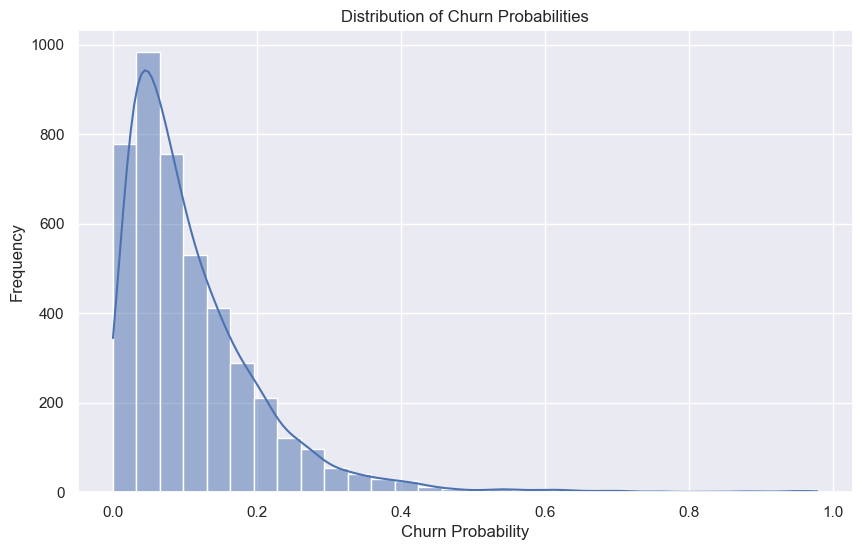

In [24]:
# Plot the distribution of churn probabilities

plt.figure(figsize=(10, 6))
sns.histplot(df_churn_prob['churn_probability'], kde=True, bins=30)
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()

The histogram indicates that churn is a low-probability event for most customers in this dataset. 

### Churn Probability by Segments


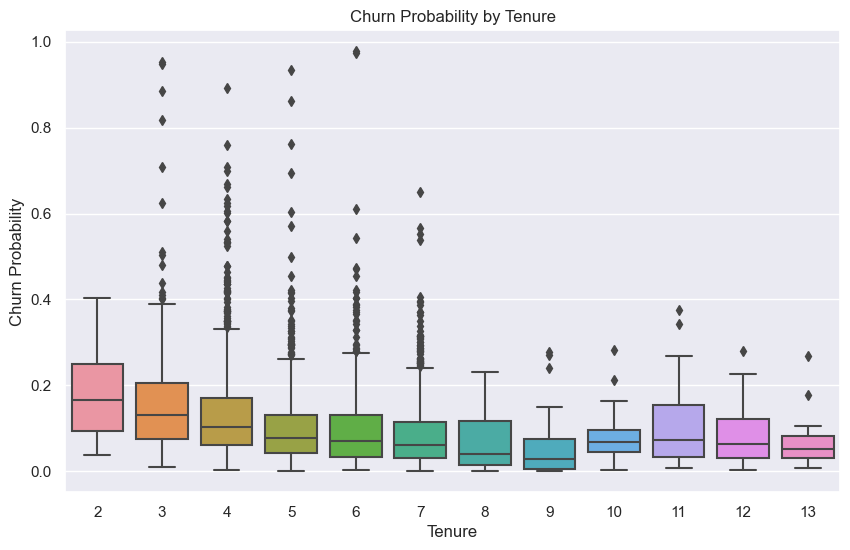

In [25]:
# Churn probabilities visualisation by tenure

plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure', y='churn_probability', data=df_churn_prob)
plt.title('Churn Probability by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Probability')
plt.show()

There is a general trend of decreasing churn probability with increasing tenure. Customers with longer tenure tend to have lower churn probabilities. Customers with a tenure of 2 to 6 years have higher median churn probabilities and a higher number of outliers with very high churn probabilities. This suggests that newer customers are more likely to churn compared to those who have been with the company longer.

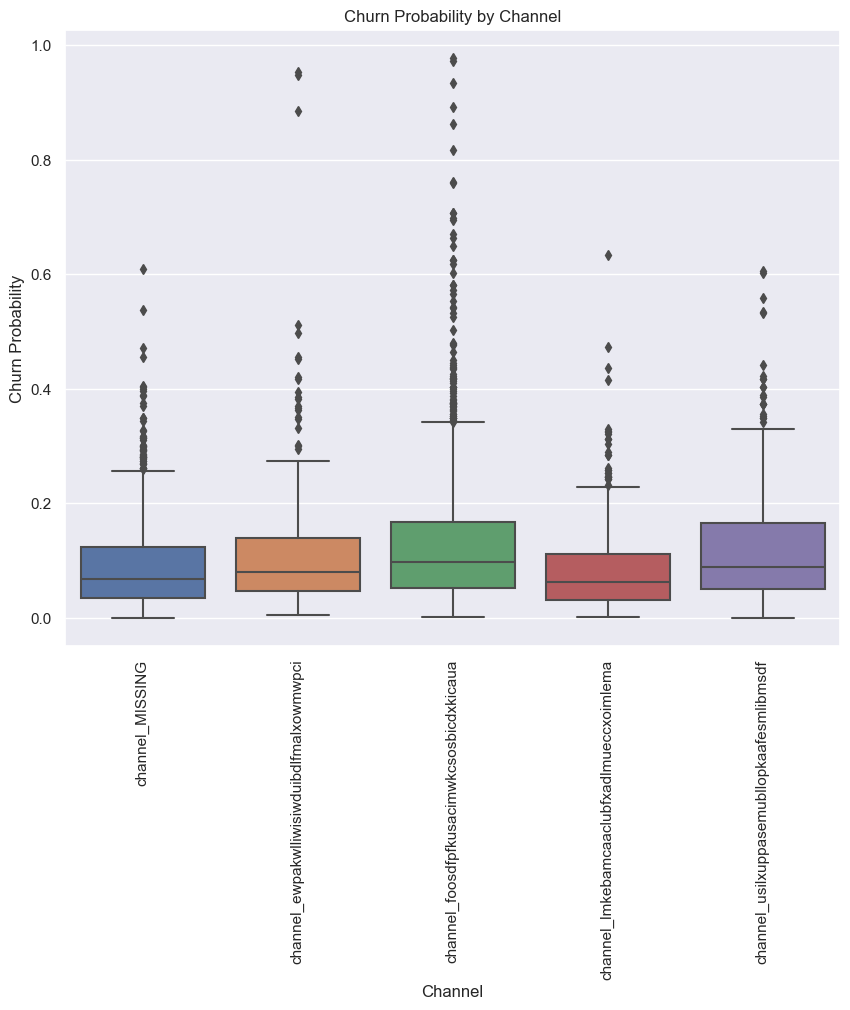

In [26]:
# Churn probabilities visualisation by sales channels

channels = [col for col in df_churn_prob.columns if col.startswith('channel')]
df_melted = df_churn_prob.melt(id_vars=['churn_probability'], value_vars=channels, var_name='channel', value_name='presence')

plt.figure(figsize=(10, 8))
sns.boxplot(x='channel', y='churn_probability', data=df_melted[df_melted['presence'] == 1])
plt.title('Churn Probability by Channel')
plt.xlabel('Channel')
plt.ylabel('Churn Probability')
plt.xticks(rotation=90)
plt.show()

Different acquisition channels show varying levels of churn probabilities. This indicates that the source through which customers are acquired can significantly impact their likelihood to churn. Channels such as channel_fuosdfpkfuubfxadlmuecxoimlema and channel_MISSING have higher median churn probabilities and more frequent outliers. Targeted retention strategies should be developed for customers acquired through these channels. This could include personalized engagement, enhanced support, and tailored offers to reduce churn risk.

As we noticed before that prices playes not the last role in churn, lets deep diver into this investigation.

In [27]:
# Choose columns for analysis

price_columns = ['var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak']

# Create price ranges (bins) and labels
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '400+']

# Create a new column for each price column to store the price range
for col in price_columns:
    df_churn_prob[f'{col}_range'] = pd.cut(df_churn_prob[col], bins=bins, labels=labels)


In [28]:
# Calculate average churn probability for each price range
churn_prob_by_price = {}

for col in price_columns:
    churn_prob_by_price[col] = df_churn_prob.groupby(f'{col}_range')['churn_probability'].mean()

# Convert to DataFrame for easier manipulation
churn_prob_by_price_df = pd.DataFrame(churn_prob_by_price)
churn_prob_by_price_df

,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak
0-50,0.111144,0.122942,0.131815,0.109501,0.128553,0.129527,0.110785,0.121831,0.131229
51-100,NaN,NaN,NaN,0.371000,0.197154,0.193000,0.371000,0.197154,0.193000
101-150,NaN,NaN,NaN,0.320500,0.180588,NaN,0.320500,0.180588,NaN
151-200,NaN,NaN,NaN,0.211000,0.178750,NaN,0.211000,0.178750,NaN
201-250,NaN,NaN,NaN,0.171000,NaN,NaN,0.171000,NaN,NaN
251-300,NaN,NaN,NaN,0.244667,NaN,NaN,0.244667,NaN,NaN
301-350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351-400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


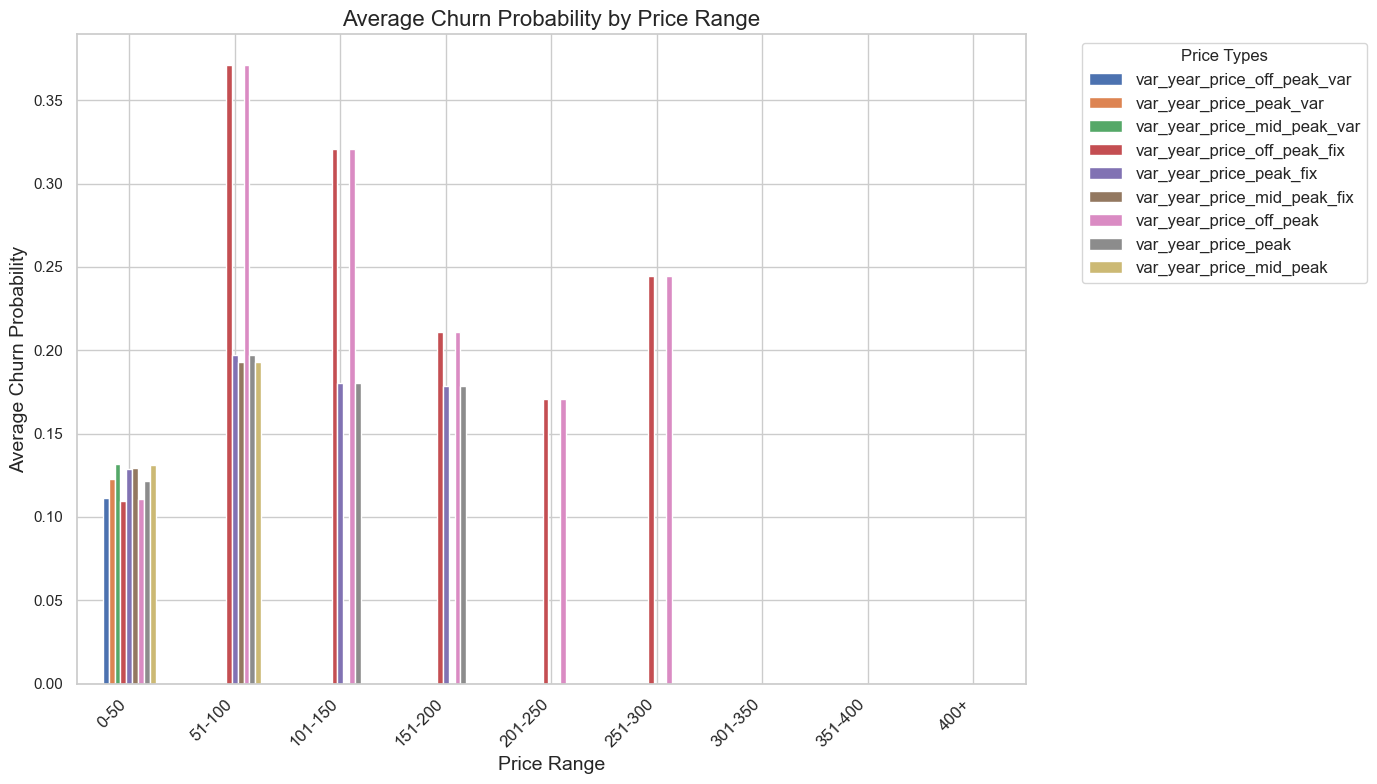

In [29]:
# Plot of average churn probability

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))

churn_prob_by_price_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.legend(title='Price Types', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax.set_title('Average Churn Probability by Price Range', fontsize=16)
ax.set_xlabel('Price Range', fontsize=14)
ax.set_ylabel('Average Churn Probability', fontsize=14)

plt.tight_layout()
plt.show()

There is a noticeable trend where the churn probability varies significantly across different price ranges. Certain price ranges exhibit higher churn probabilities, which suggests that price is a critical factor influencing customer churn. Different price types (off-peak, peak, fixed, variable) show similar trends within each price range. However, certain price types exhibit slightly higher churn probabilities in specific ranges, indicating nuanced price sensitivity across different billing models.


### Identifying High-Risk Customers

In [30]:
high_risk_threshold = 0.7  
high_risk_customers = df_churn_prob[df_churn_prob['churn_probability'] > high_risk_threshold]

high_risk_summary = high_risk_customers.describe()
high_risk_summary

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
count,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,...,13.0,13.000000,13.000000,13.0,13.0,13.0,13.000000,13.000000,13.0,13.000000
mean,4.836363,0.0,1.947027,2.651637,2.153846,1.570409,0.135881,0.028937,45.026640,0.0,...,0.0,0.230769,0.769231,0.0,0.0,0.0,0.230769,0.769231,1.0,0.859923
std,0.447270,0.0,2.208806,0.313414,7.765803,0.458219,0.022433,0.045230,4.641907,0.0,...,0.0,0.438529,0.438529,0.0,0.0,0.0,0.438529,0.438529,0.0,0.099305
min,3.876218,0.0,0.000000,2.256429,0.000000,1.171726,0.100167,0.000000,40.606701,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.708000
25%,4.687243,0.0,0.000000,2.496694,0.000000,1.228657,0.116910,0.000000,44.311378,0.0,...,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000,1.0,0.761000
50%,4.732980,0.0,0.000000,2.621083,0.000000,1.279211,0.140621,0.000000,44.311378,0.0,...,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000,1.0,0.885000
75%,5.032901,0.0,3.956168,2.704090,0.000000,2.163877,0.144902,0.091858,45.806878,0.0,...,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000,1.0,0.948000
max,5.534780,0.0,4.818576,3.320339,28.000000,2.227270,0.186188,0.100572,58.995952,0.0,...,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.0,0.978000


From the descriptive statistics of the high-risk customers with a churn probability threshold of 0.7 we can make some conclusions:
- The standard deviation of consumptions (cons_12m) is 0.3666, that indicating low variability in the annual consumption among high-risk customers. Most of them have similar consumption patterns.
- There is no gas usage (cons_gas_12m) among these high-risk customers, as indicated by a mean and standard deviation of 0. This could imply that customers with no gas usage are more likely to churn.
- Although the mean forecast price for energy peak is low (0.0175), the standard deviation is relatively high (0.0390), indicating significant variability. Some high-risk customers are exposed to higher peak prices.